In [11]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By

In [31]:
from bs4 import BeautifulSoup

In [195]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

In [196]:
url = 'https://utis.pohang.go.kr/'

In [197]:
driver.get(url)

In [198]:
# 교통 통계 클릭
driver.find_element(By.XPATH, '//*[@id="container"]/div/div/div[1]/div[3]').click()

In [199]:
# 도로 화살표 클릭
driver.find_element(By.XPATH, '//*[@id="roadName"]').click()

In [200]:
# 도로이름 선택
driver.find_element(By.XPATH, '//*[@id="roadName"]/option[3]').click()

In [201]:
# 월 화살표
driver.find_element(By.XPATH, '//*[@id="month"]').click()

In [202]:
# 월 선택
driver.find_element(By.XPATH, '//*[@id="month2"]').click()

In [203]:
# 일 화살표
driver.find_element(By.XPATH, '//*[@id="day"]').click()

In [204]:
# 일 선택
driver.find_element(By.XPATH, '//*[@id="day6"]').click()

In [205]:
# 조회
driver.find_element(By.XPATH, '//*[@id="background"]/div[1]/div[3]/div/div/form/button').click()

In [206]:
html = driver.page_source

In [207]:
soup = BeautifulSoup(html, 'html.parser')

In [216]:
# 효자 > 대잠 데이터 추출
route1 = soup.select('tr')[1]

In [217]:
route1

<tr><td>MBC &gt; 대잠사거리</td><td>-</td><td>43</td><td>43</td><td>38</td><td>60</td><td>113</td><td>380</td><td>849</td><td>1044</td><td>751</td><td>766</td><td>877</td><td>826</td><td>833</td><td>865</td><td>891</td><td>895</td><td>887</td><td>894</td><td>538</td><td>456</td><td>376</td><td>334</td><td>161</td></tr>

In [218]:
for i in range(1, 7):
    print(i)

1
2
3
4
5
6


In [65]:
import time

In [247]:
url = 'https://utis.pohang.go.kr/'
def crawler(month, day):
    results = []
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
    driver.get(url)
    driver.maximize_window()
    time.sleep(0.5)
    # 교통 통계 클릭
    driver.find_element(By.XPATH, '//*[@id="container"]/div/div/div[1]/div[3]').click()
    time.sleep(0.5)
    # 도로 화살표 클릭
    driver.find_element(By.XPATH, '//*[@id="roadName"]').click()
    time.sleep(0.5)
    # 도로이름 선택
    driver.find_element(By.XPATH, '//*[@id="roadName"]/option[3]').click()
    time.sleep(0.5)
    # 월 화살표
    driver.find_element(By.XPATH, '//*[@id="month"]').click() 
    time.sleep(0.5)
    # 월 선택
    driver.find_element(By.XPATH, f'//*[@id="month{month}"]').click()
    time.sleep(0.5)
    # 일 화살표
    driver.find_element(By.XPATH, '//*[@id="day"]').click()
    time.sleep(0.5)
    # 일 선택
    driver.find_element(By.XPATH, f'//*[@id="day{day}"]').click()
    time.sleep(0.5)
    # 조회
    driver.find_element(By.XPATH, '//*[@id="background"]/div[1]/div[3]/div/div/form/button').click()
    time.sleep(2)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    for k in range(1, 7):
        route = soup.select('tr')[k].select('td')[2:]
        # 1시부터 23시까지
        traffic_volume = [int(tag.get_text()) for tag in route]
        results.append(traffic_volume)
    
    return results

In [225]:
print(len(a))
for i in range(len(a)):
    print(len(a[i]))

6
23
23
23
23
23
23


In [245]:
a = np.array(a)

In [175]:
months = [1, 2, 3]
days = [
    [2, 3, 4, 5, 6,
     9, 10, 11, 12, 13,
     16, 17, 18, 19, 20],
    [6, 7, 8, 9, 10,
     13, 14, 15, 16, 17,
     20, 21, 22, 23, 24],
    [6, 7, 8, 9, 10,
     13, 14, 15, 16, 17]
]

In [248]:
results = []
for i in range(3):
    for day in days[i]:
        print(f'{months[i]}월 {day}일  수집중####')
        traffic_volumes = crawler(months[i], day)
        results.append(traffic_volumes)

1월 2일  수집중####
1월 3일  수집중####
1월 4일  수집중####
1월 5일  수집중####
1월 6일  수집중####
1월 9일  수집중####
1월 10일  수집중####
1월 11일  수집중####
1월 12일  수집중####
1월 13일  수집중####
1월 16일  수집중####
1월 17일  수집중####
1월 18일  수집중####
1월 19일  수집중####
1월 20일  수집중####
2월 6일  수집중####
2월 7일  수집중####
2월 8일  수집중####
2월 9일  수집중####
2월 10일  수집중####
2월 13일  수집중####
2월 14일  수집중####
2월 15일  수집중####
2월 16일  수집중####
2월 17일  수집중####
2월 20일  수집중####
2월 21일  수집중####
2월 22일  수집중####
2월 23일  수집중####
2월 24일  수집중####
3월 6일  수집중####
3월 7일  수집중####
3월 8일  수집중####
3월 9일  수집중####
3월 10일  수집중####
3월 13일  수집중####
3월 14일  수집중####
3월 15일  수집중####
3월 16일  수집중####
3월 17일  수집중####


In [228]:
print(len(results))

40


In [249]:
import numpy as np

In [250]:
results = np.array(results)

In [251]:
results.shape

(40, 6, 23)

In [253]:
results_2d = np.mean(results, axis=0)

In [255]:
results_2d.shape

(6, 23)

In [256]:
results_2d[5]

array([  82.425,   68.975,   58.05 ,   80.15 ,  141.475,  394.4  ,
        785.975, 1203.975, 1056.325, 1055.325, 1116.85 , 1135.55 ,
       1167.925, 1192.175, 1263.125, 1344.7  , 1795.65 , 1699.1  ,
       1059.25 ,  724.75 ,  637.   ,  476.425,  307.95 ])

In [258]:
results_2d_int = results_2d.astype(int)

In [266]:
import pickle
with open('route_lambda.pickle', 'wb') as f:
    pickle.dump(results_2d_int, f)

In [267]:
with open('route_lambda.pickle', 'rb') as f:
    b = pickle.load(f)

In [273]:
b[5][22]

307

In [263]:
from IPython.display import Image

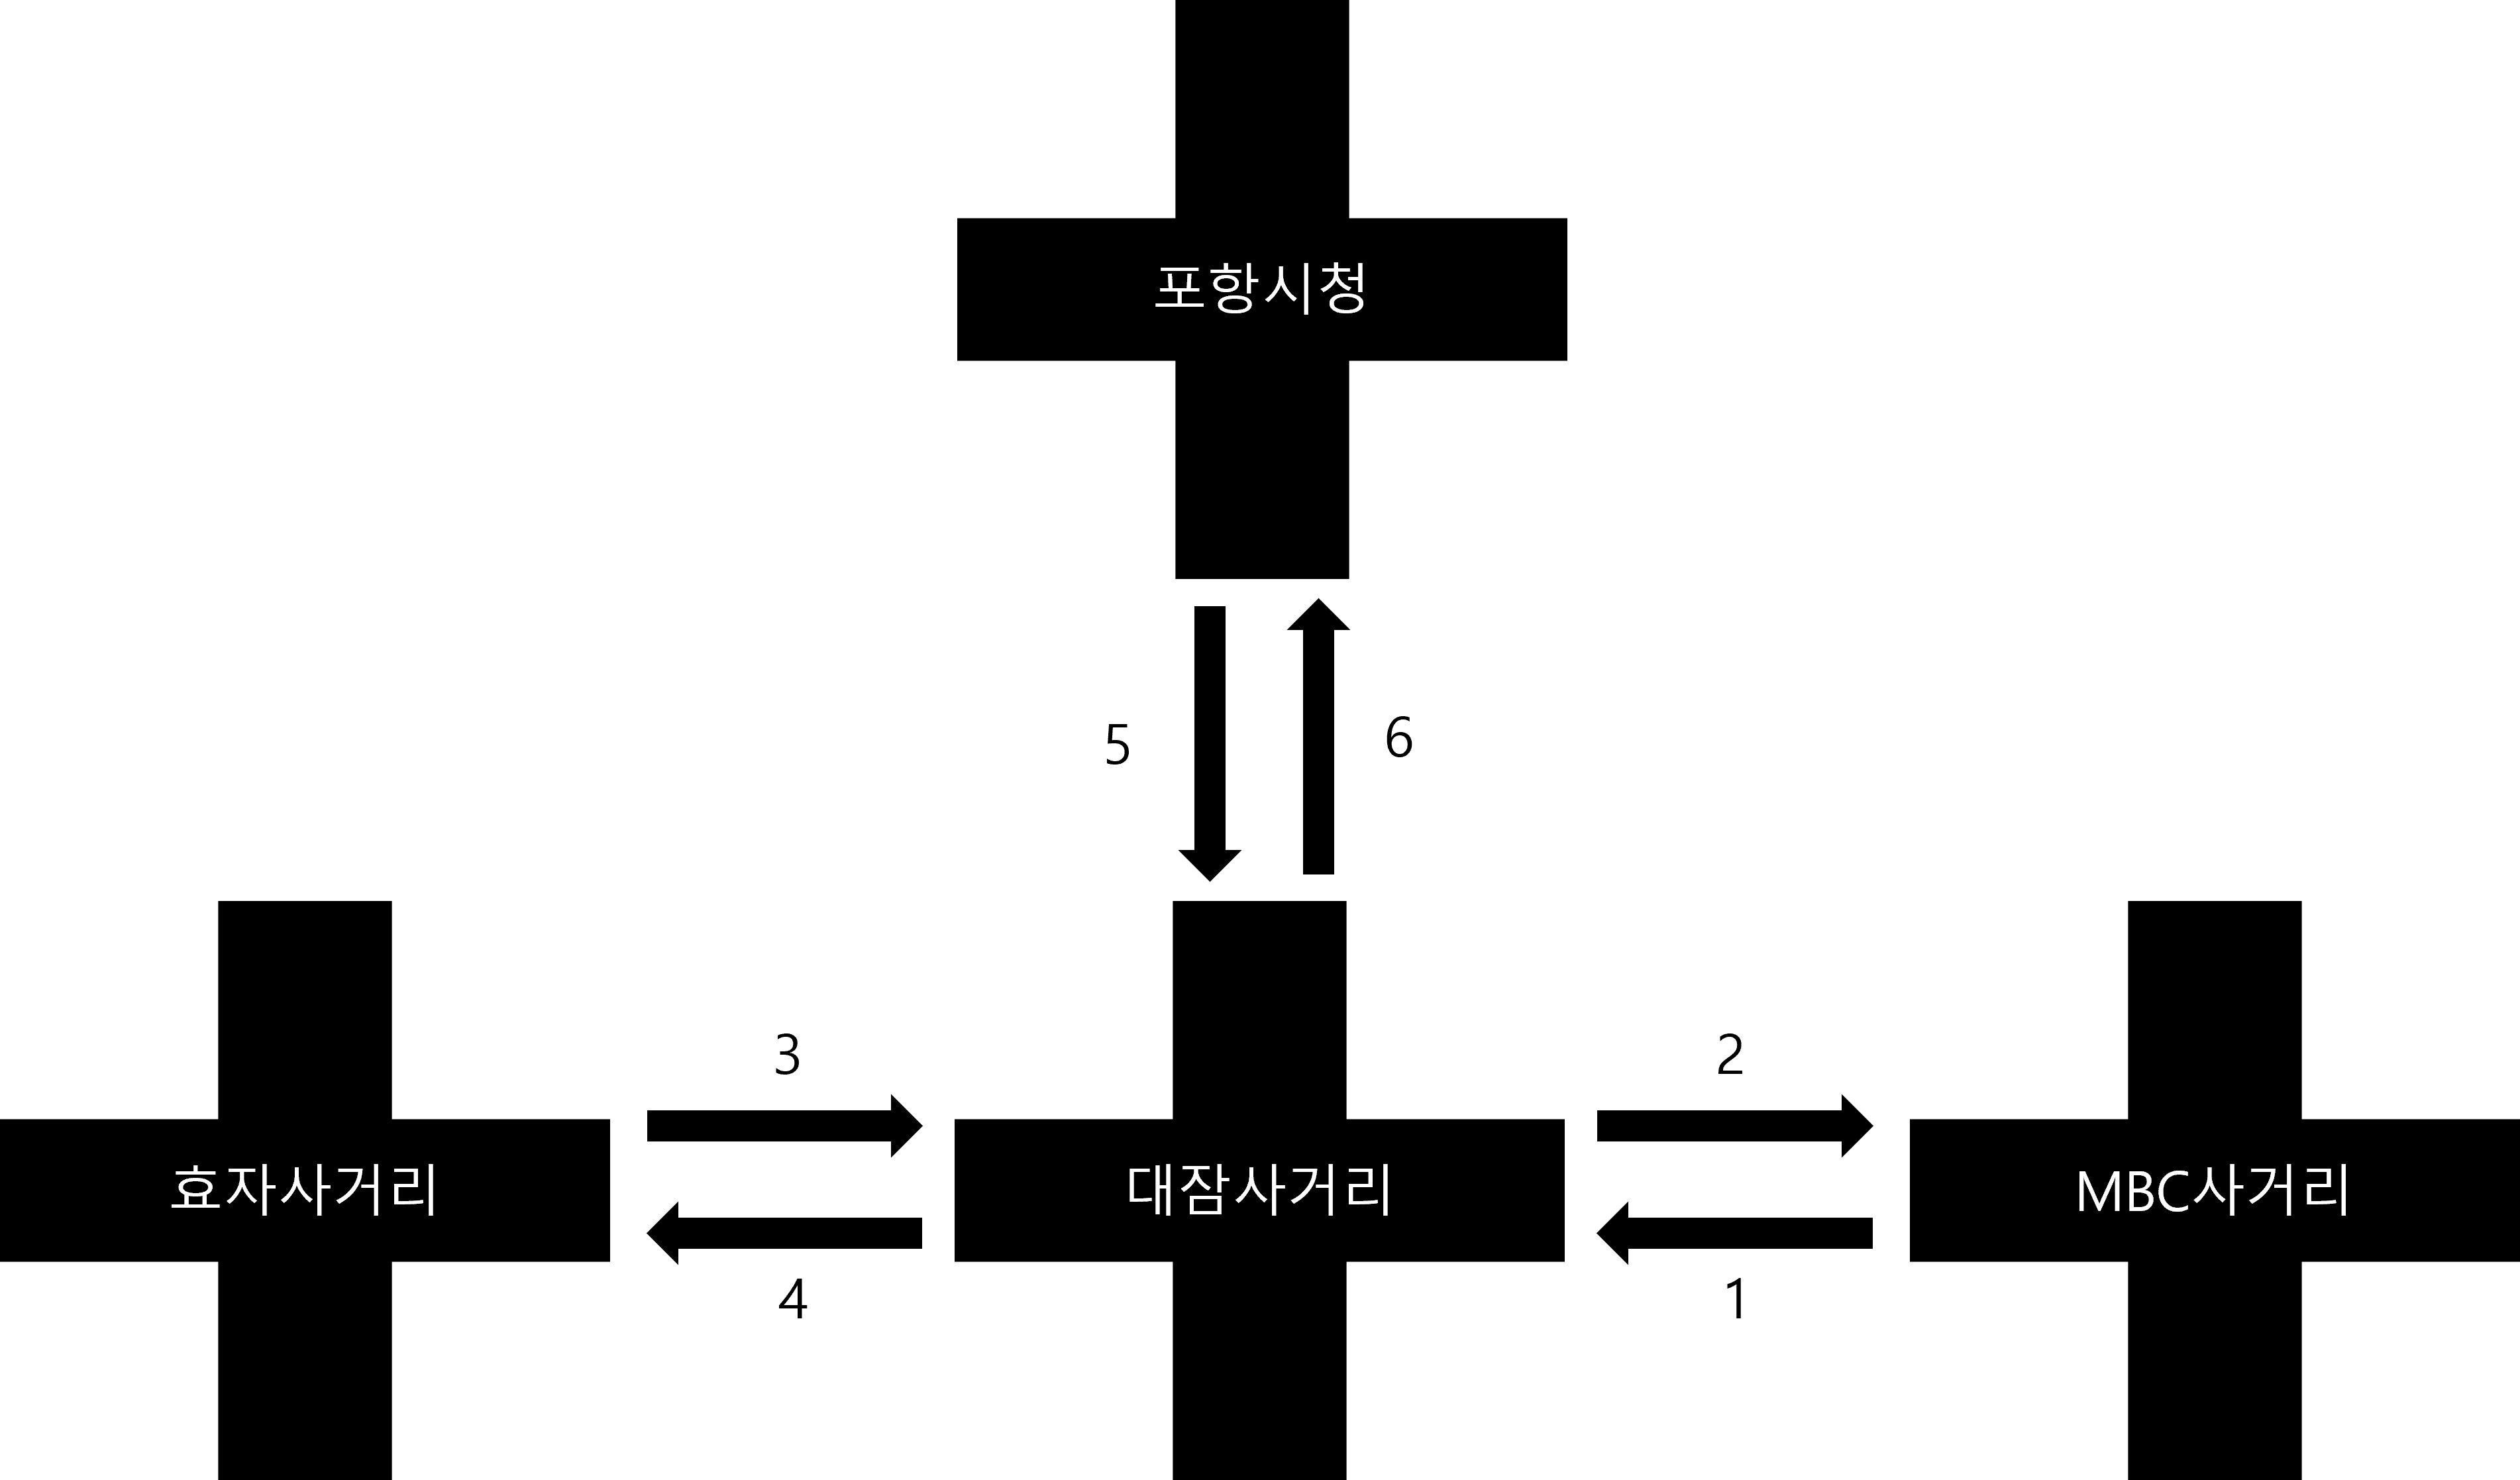

In [264]:
Image("./구조도.png")

In [282]:
def get_traffic_volume(vertex, time):
    import numpy as np
    import pickle
    """
    vertex : 간선 번호(1~6)
    time : 시작 시간대(1~23)
    """
    with open('./route_lambda.pickle', 'rb') as f:
        lambds = pickle.load(f)
    lamd = lambds[vertex-1][time-1]
    result = np.random.poisson(lamd, 1)
    return result

In [4]:
get_traffic_volume(3, 14)

array([1387])

In [2]:
import numpy as np
import pickle
import argparse

with open('./route_lambda.pickle', 'rb') as f:
    lambds = pickle.load(f)

def get_traffic_volume(vertex, time):
    """
    vertex : 간선 번호(1~6)
    time : 시작 시간대(1~23)
    """
    lamd = lambds[vertex-1][time-1]
    result = np.random.poisson(lamd, 1)
    return result

def main():
    parser = argparse.ArgumentParser(description="Get Traffic Volume in specific route and time")
    parser.add_argument('vertex', type=int, help='Vertex number 1~6')
    parser.add_argument('time', type=int, help = "Specific Time 1~23")
    
    args = parser.parse_args()
    
    result = get_traffic_volume(args.vertex, args.time)
    print(result)

In [3]:
main()

usage: ipykernel_launcher.py [-h] vertex time
ipykernel_launcher.py: error: argument vertex: invalid int value: 'C:\\Users\\FILab\\AppData\\Roaming\\jupyter\\runtime\\kernel-8503ee6b-ced1-4e37-bc10-aecf3dc026c6.json'
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\FILab\anaconda3\lib\argparse.py", line 2483, in _get_value
    result = type_func(arg_string)
ValueError: invalid literal for int() with base 10: 'C:\\Users\\FILab\\AppData\\Roaming\\jupyter\\runtime\\kernel-8503ee6b-ced1-4e37-bc10-aecf3dc026c6.json'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\FILab\anaconda3\lib\argparse.py", line 1858, in parse_known_args
    namespace, args = self._parse_known_args(args, namespace)
  File "C:\Users\FILab\anaconda3\lib\argparse.py", line 2070, in _parse_known_args
    stop_index = consume_positionals(start_index)
  File "C:\Users\FILab\anaconda3\lib\argparse.py", line 2026, in consume_positionals
    take_action(action, args)
  File "C:\Users\FILab\anaconda3\lib\argparse.py", line 1919, in take_action
    argument_values = self._get_values(action, argument_strings)
  File "C:\Users\FILab\anaconda3\lib\argparse.py", line 24

TypeError: object of type 'NoneType' has no len()